In [15]:
%matplotlib inline

# imports
import bs4 as BeautifulSoup
import csv
import matplotlib.pyplot as plt
import nltk
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [8]:
# let's get the data from the Heroku web app: https://pressbotcity.herokuapp.com/
with open('pressbotcity.html', 'r') as f:
    html = f.read()

print html[:100]



<html>
    <head>
        <title>press + analytics</title>
        <link rel="stylesheet" href="//


In [7]:
# Grab all the 'p' HTML tags using BeautifulSoup,
# then get just the text (no tags) from them.
soup = BeautifulSoup.BeautifulSoup(html, 'html.parser')
p_tags = soup.findAll('p')
p_tags_text = [tag.text for tag in p_tags]

# Some processing
article_text = [text.encode('utf-8', 'ignore') for text in p_tags_text]
article_text = [text for text in article_text if 'Article ID' not in text and len(text) > 200]

print article_text[0]

Watch Live: Obama Campaigns With Clinton by Reuters McDonald's Corp and Tyson Foods both severed ties on Thursday with a Tennessee farm where workers were seen stabbing, clubbing and stomping on chickens in an undercover video shot by animal rights activists. The videotape, which was unveiled by Mercy For Animals at a news conference in Los Angeles, depicts gruesome animal cruelty toward the birds at what the group said was T&S Farm in Dukedom, Tennessee, which was under contract to Tyson Foods. Tyson supplies chicken to McDonald's, the world's biggest fast-food chain, for its McNuggets. Representatives for T&S Farm could not be reached for comment. "Animal well-being is a priority at our company and we will not tolerate the unacceptable animal treatment shown in this video," Tyson spokesman Worth Sparkman said. "Members of our animal well-being team are investigating, however, based on what we currently know, we are terminating the farmer's contract to grow chickens for us," said Spar

In [14]:
# Get the tfidf matrix for these documents,
# in sparse matrix form
tfidf = TfidfVectorizer().fit_transform(article_text)

print tfidf

  (0, 1756)	0.0512561017186
  (0, 1652)	0.0512561017186
  (0, 1112)	0.047095811755
  (0, 1625)	0.0641791427011
  (0, 1396)	0.0566196483311
  (0, 1615)	0.0641791427011
  (0, 1134)	0.0512561017186
  (0, 1358)	0.0361371129785
  (0, 182)	0.0266132764024
  (0, 1614)	0.0512561017186
  (0, 13)	0.0566196483311
  (0, 157)	0.0566196483311
  (0, 1044)	0.0641791427011
  (0, 359)	0.0566196483311
  (0, 1527)	0.047095811755
  (0, 2066)	0.0307735663661
  (0, 1340)	0.027899579991
  (0, 1385)	0.0566196483311
  (0, 2179)	0.0383330607361
  (0, 882)	0.02124972979
  (0, 919)	0.0641791427011
  (0, 1563)	0.0641791427011
  (0, 1552)	0.0566196483311
  (0, 25)	0.0641791427011
  (0, 1739)	0.0512561017186
  :	:
  (21, 523)	0.0375115226755
  (21, 192)	0.0493415100735
  (21, 150)	0.110230260791
  (21, 785)	0.251954881807
  (21, 1188)	0.0944830806777
  (21, 2113)	0.0214619182861
  (21, 1940)	0.220460521581
  (21, 1632)	0.0196071676093
  (21, 149)	0.125977440904
  (21, 2086)	0.0629887204518
  (21, 2038)	0.039214335218

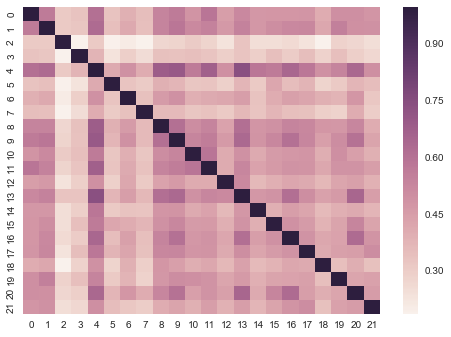

In [17]:
sns.heatmap((tfidf * tfidf.T).todense())